In [57]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import networkx as nx
import random
import os
import imageio
from collections import Counter
import shutil

# Task 1

In [58]:
def SIR_model(SI_list, t, beta, r, flaga):
    
    '''It is the helper function to solve the SIR model system od ODEs. 
    Function returns three arguments, which are needed for further calculatons
    beta, r - parameter of the equation; type: float
    beta - infectivity
    r - overall rate of recovery 
    SI_list - list of two arguments S,I - initial consitions; type: float
    S - susceptible
    I - infected
    R - removed
    t - timeline of the solution, list of time points; type: float'''
    
    S = SI_list[0]
    I = SI_list[1]
    if flaga == 'SIR_model':
        dSdt = -beta*S*I
        dIdt = beta*S*I-r*I
        dRdt = r*I 
        sol = [dSdt, dIdt, dRdt]
    elif flaga == 'SIR_model_reduced':
        dSdt = -beta*S*I
        dIdt = beta*S*I-r*I
        sol = [dSdt, dIdt]
    return sol

In [59]:
def SIR_model_sol(SIR_list,beta,r,N,flaga):
    
    '''Function solve the SIR model and return if there will be pandemic or not
    SIR_list - list on initial condition, S, I
    beta - infectivity; type - float 
    r - overall rate of recovery; type - float 
    N - population; type - int
    flaga - which model; type - str'''
    
    R0 = (beta*N)/r
    n=1000
    t = np.linspace(0,100,n)
    S= np.array(len(t)*[[0]])
    I= np.array(len(t)*[[0]])
    R= np.array(len(t)*[[0]])
    S[0] = SIR_list[0]
    I[0] = SIR_list[1]
    R[0] = SIR_list[2]
    for i in range(1,len(t)):
        scope = [t[i-1], t[i]]
        sol = odeint(SIR_model, SIR_list, scope, args = (beta, r, flaga))
        S[i] = sol[1][0]
        I[i] = sol[1][1]
        R[i] = sol[1][2]
        SIR_list = sol[1]
    if R0 > 1:
        if_epidemic = 'There will be an epidemic'
    else:
        if_epidemic = 'There will be no epidemic' 
    return t, S, I, R, beta, r, if_epidemic

In [60]:
def plot_SIR_model_sol(t,S,I,R,if_epidemic):
    
    '''Function plot the soluton of SIR model'''
    plt.figure(figsize = (10, 8))
    plt.plot(t, S, 'b-', label = 'S(t)')
    plt.plot(t, I, 'r-', label = 'I(t)')
    plt.plot(t, R, 'g-', label = 'R(t)')
    plt.ylabel('values')
    plt.xlabel('time horizont')
    plt.legend(loc = 'best')
    plt.title(if_epidemic)
    plt.show()

In [61]:
t, S, I, R, beta, r, if_epidemic = SIR_model_sol([5000, 200, 0], 0.001, 0.5, 10000, 'SIR_model')

parameter of invectivity:  0.001
recovery rate:  0.5


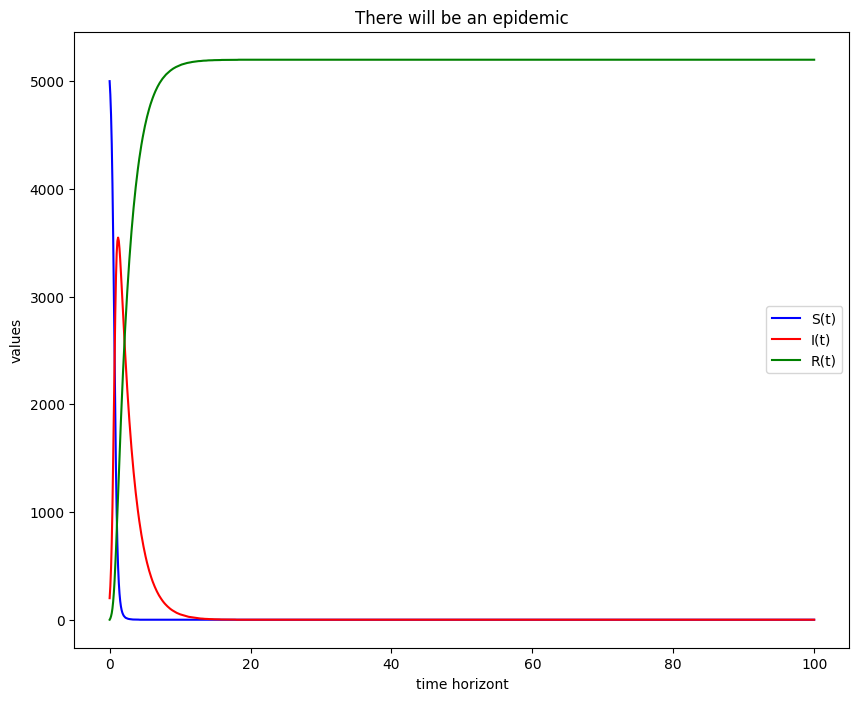

In [62]:
print('parameter of invectivity: ', beta)
print('recovery rate: ', r)
plot_SIR_model_sol(t, S, I, R, if_epidemic)

In [63]:
t1, S1, I1, R1, beta1, r1, if_epidemic1 = SIR_model_sol([1000, 200, 5], 0.001, 0.9, 10000, 'SIR_model')

parameter of invectivity:  0.001
recovery rate:  0.9


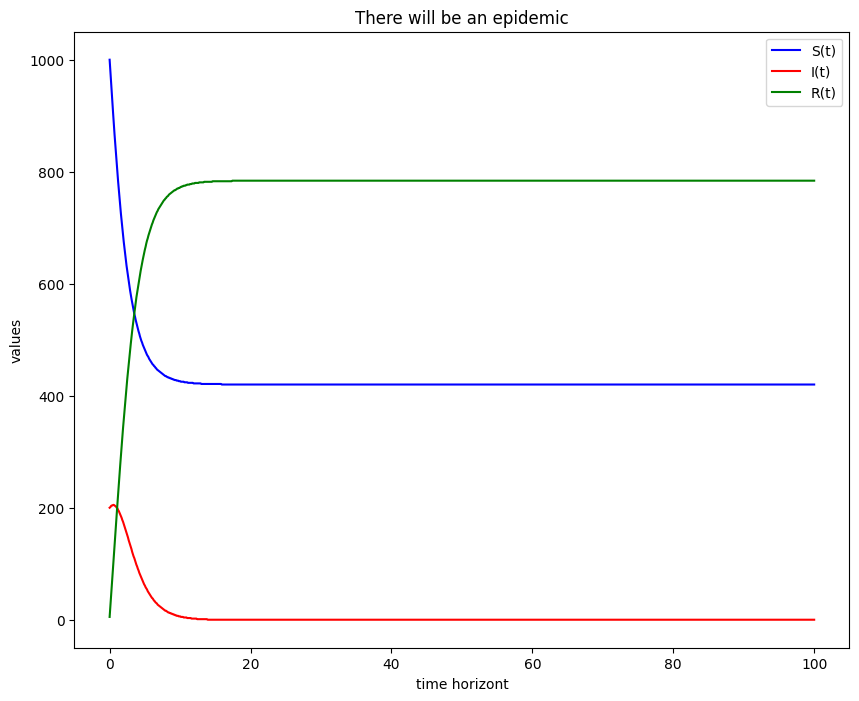

In [64]:
print('parameter of invectivity: ', beta1)
print('recovery rate: ', r1)
plot_SIR_model_sol(t1, S1, I1, R1, if_epidemic1)

In [65]:
t2, S2, I2, R2, beta2, r2, if_epidemic2 = SIR_model_sol([100,10,0], 0.001, 1.1, 1000, 'SIR_model')

parameter of invectivity:  0.001
recovery rate:  1.1


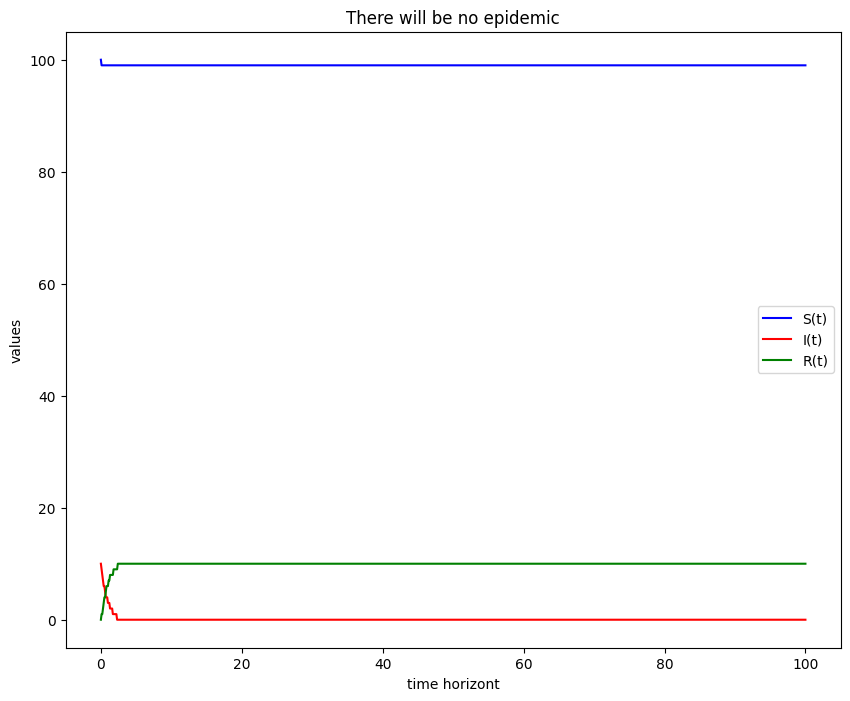

In [66]:
print('parameter of invectivity: ', beta2)
print('recovery rate: ', r2)
plot_SIR_model_sol(t2, S2, I2, R2, if_epidemic2)

In [67]:
def SIR_model_reduced_solution(S0, flaga):
    '''Function draw the phase portrait of the solution of reduced SIR model
    S0 - initial conditio, type - int
    flaga - SIR_model_reduced; type: str'''
    t = np.linspace(0, 100, 100000)
    I0_range = [1, 50, 150]
    beta = 0.2
    r = 170
    for I0 in I0_range:
        x0 = [S0, I0]
        sol = odeint(SIR_model, x0, t, args = (beta, r, flaga))
        plt.plot(sol[:,0], sol[:,1], '-')
    y1 = np.linspace(0, 1000, 20)
    y2 = np.linspace(0, 200, 20)

    Y1, Y2 = np.meshgrid(y1, y2)

    t0 = 0

    u, v = np.zeros(Y1.shape), np.zeros(Y2.shape)

    NI, NJ = Y1.shape

    for i in range(NI):
        for j in range(NJ):
            x = Y1[i, j]
            y = Y2[i, j]
            yprime = SIR_model([x, y], t0, beta, r, flaga)
            u[i,j] = yprime[0]
            v[i,j] = yprime[1]
     

    Q = plt.quiver(Y1, Y2, u, v, color='r')

    plt.xlabel('$y_1$')
    plt.ylabel('$y_2$')
    

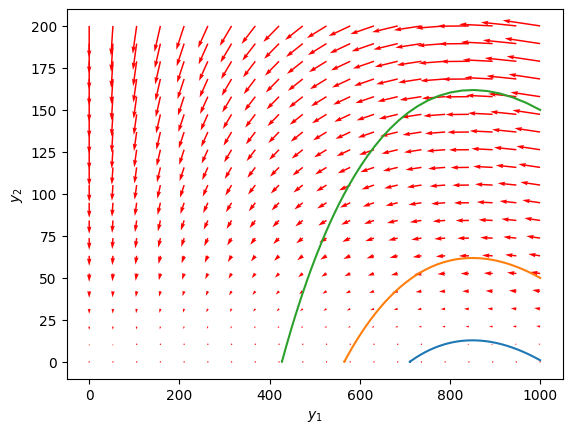

In [68]:
SIR_model_reduced_solution(1000, 'SIR_model_reduced')

In [69]:
def SIR_infection(SIR_list, beta, r, N, flaga):
    
    '''Function check how many nodes will be infected to the end of the pandemic
    SIR_list - initial consition of S, I
    beta, r - parameter of the equation; type - float 
    N - population; type - int'''
    
    R0 = (beta*N)/r
    n = 1000
    t = np.linspace(0,100,n)
    S = np.array(len(t)*[[0]])
    I = np.array(len(t)*[[0]])
    R = np.array(len(t)*[[0]])
    S[0] = SIR_list[0]
    I[0] = SIR_list[1]
    R[0] = SIR_list[2]
    for i in range(1,n):
        scope = [t[i-1], t[i]]
        sol = odeint(SIR_model, SIR_list, scope, args = (beta, r, flaga))
        S[i] = sol[1][0]
        I[i] = sol[1][1]
        R[i] = sol[1][2]
        SIR_list = sol[1]
        if i >300 and I[i] < 10**(-3):
            return R[i]
            break

In [70]:
infections = SIR_infection([5000, 200, 0], 0.001, 0.5, 10000, 'SIR_model')
print('Total number of individuals infected till the end of the pandemic: ', infections)

Total number of individuals infected till the end of the pandemic:  [5199]


In [71]:
def SIR_infection_sol(N):
    
    '''Fuction solve the SIR model with infection'''
    
    v_R0 = []
    total_infected = []
    betas = [x/100 for x in range(1, 101, 10)]
    v_r = [x1 for x1 in range(1, 101, 10)]
    for beta in betas:
        for r in v_r:
            R0 =N*beta/r
            sol = SIR_infection([N, 5, 0], beta, r, N, 'SIR_model')
            if R0 not in v_R0 and beta != r and sol is not None:
                v_R0.append(R0)
                total_infected.append(sol)
    R0_dic = dict(zip(v_R0,total_infected))
    sort_R0_dic = dict(sorted(R0_dic.items()))
    return sort_R0_dic

In [72]:
sort_R0_dic = SIR_infection_sol(100)

In [73]:
R0 = list(sort_R0_dic.keys())
infected = list(sort_R0_dic.values())

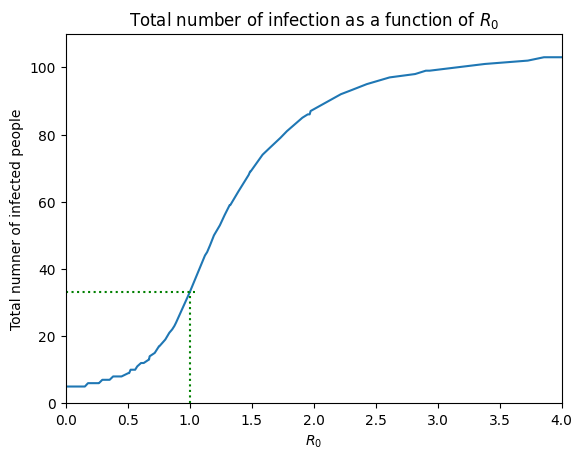

In [74]:
plt.plot(R0,infected)
plt.axvline(x = 1.0, ymin = 0, ymax = 0.3, color = 'green', linestyle = ':')
plt.axhline(y = sort_R0_dic[1.0], xmin = 0, xmax = 0.26, color = 'green', linestyle = ':')
plt.xlim([0, 4])
plt.xlabel('$R_0$')
plt.ylabel('Total numner of infected people')
plt.title('Total number of infection as a function of $R_0$')
plt.show()

## Task 2

In [75]:
def Gif(path, name):
    
    '''Function to create gif of a random walk of a graph
    path is a directory of the photos, str 
    name is the name of the model, str; RN, BA, WS, lattice.'''
    
    images = []
    dirs = os.listdir(path)
    new_images = sorted(dirs, key = len)
    for file in new_images:
        if file.endswith(".png"):
                images.append(imageio.imread(file))
    kargs = { 'duration': 1 }
    imageio.mimsave('C:\\Users\\Ja\\OneDrive\\Pulpit\\Applied math\\semestr 1\\Diffusion processes\\lab 5\\' + name + ".gif" , images, **kargs)

In [76]:
def SIR_model_on_graph(p,G,N):
    
    '''Function visualize the spreding of the infection on a given network, the 
    outcomes will be use to create gif
    
    p - probability of contagion between node. One of them is infected and the other is susceptible, type: int
    G - graph object, type: nx object
    N - size of the latice, by default 10x10'''
    
    if G == "lattice":
        G = nx.grid_2d_graph(N,N)
        pos = dict( (n, n) for n in G.nodes() )
        labels = dict( ((i, j), i * N + j) for i, j in G.nodes() )
        start = (random.randint(0, N-1),random.randint(0, N-1))
    else:
        start = random.randint(0,len(G.nodes()))
        pos = nx.spring_layout(G)
        labels = {i: i for i in range(0,len(G.nodes()))}
    all_nodes = G.nodes()
    infected_nodes = [start]
    recovered_nodes = []
    susceptible_nodes = list(set(all_nodes) - set(infected_nodes))
    nx.draw_networkx_edges(G, pos)       
    nx.draw_networkx_nodes(G, pos, nodelist = susceptible_nodes, node_color = 'b')
    nx.draw_networkx_nodes(G, pos, nodelist = infected_nodes, node_color = 'r')
    nx.draw_networkx_nodes(G, pos, nodelist = recovered_nodes, node_color = 'g')
    nx.draw_networkx_labels(G, pos, labels, font_size = 14)
    plt.savefig("Graph" + str(0) + ".png", dpi = 300)
    counter = 0
    list_counter = []
    fraction_of_p = []
    graphs=[]
    while len(infected_nodes) > 0:
        fraction_of_p.append(len(infected_nodes)/len(G.nodes()))
        contaged_at_timestep = []
        recovered_at_timestep = []
        for infected in infected_nodes:
            neighbours = list(G.neighbors(infected))
            susceptible_neighbours=[]
            for neighbour in neighbours:
                if neighbour in susceptible_nodes:
                    susceptible_neighbours.append(neighbour)
            for i in susceptible_neighbours:
                rand = random.random()
                if rand < p:
                    contaged_at_timestep.append(i)
                    susceptible_nodes.remove(i)
            recovered_nodes.append(infected)
            recovered_at_timestep.append(infected)
        for z in contaged_at_timestep:
            infected_nodes.append(z)
        for s in recovered_at_timestep:
            infected_nodes.remove(s)
        nx.draw_networkx_nodes(G, pos, nodelist = susceptible_nodes, node_color = 'b')
        nx.draw_networkx_nodes(G, pos, nodelist = infected_nodes, node_color = 'r')
        nx.draw_networkx_nodes(G, pos, nodelist = recovered_nodes, node_color = 'g')
        nx.draw_networkx_edges(G, pos) 
        counter+=1 
        plt.savefig("Graph" + str(counter) + ".png", dpi = 300)
        
        list_counter.append(counter)   
        
    plt.figure(figsize=(20,20))
    plt.show()

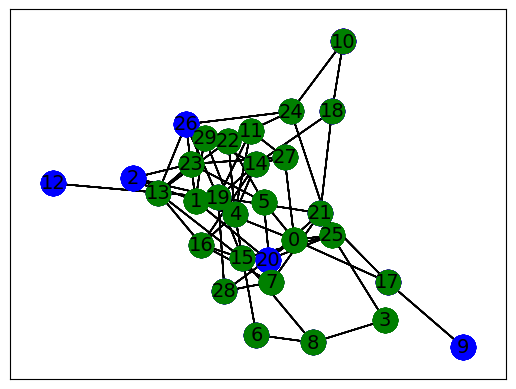

<Figure size 2000x2000 with 0 Axes>

In [77]:
G = nx.fast_gnp_random_graph(30, 0.2)
SIR_model_on_graph(0.45, G, 10)

In [81]:
import os
import imageio

# Define the Gif function (with compatibility for imageio.v2)
def Gif(path, name):
    images = []
    for file_name in sorted(os.listdir(path)):
        if file_name.endswith('.png'):
            file_path = os.path.join(path, file_name)
            images.append(imageio.v2.imread(file_path))  # Use imageio.v2 for compatibility
    kargs = {'duration': 1}
    
    # Set the output directory to a more accessible location
    output_directory = r'C:\Users\user\Desktop\list5\gif_output'
    if not os.path.exists(output_directory):
        os.makedirs(output_directory)
    
    output_path = os.path.join(output_directory, name + ".gif")
    imageio.mimsave(output_path, images, **kargs)

# Set the base directory path
base_path = r'C:\Users\user\Desktop\list5'
gif_directory = 'gif'
gif_path = os.path.join(base_path, gif_directory)

# Check if the gif directory exists, and create it if it does not
if not os.path.exists(gif_path):
    os.makedirs(gif_path)

# Change to the gif directory
os.chdir(gif_path)

# Call the Gif function
Gif(gif_path, 'Random_task2')

# Change back to the base directory
os.chdir(base_path)


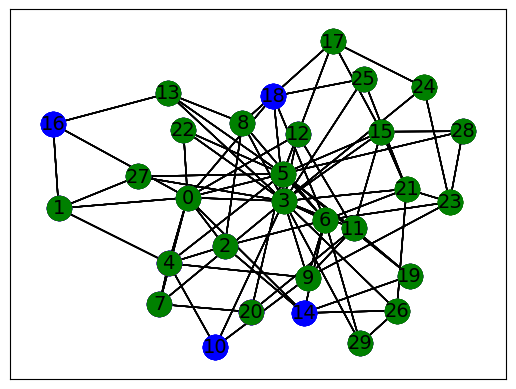

<Figure size 2000x2000 with 0 Axes>

In [83]:
G = nx.barabasi_albert_graph(30, 3)
SIR_model_on_graph(0.45, G, 10)

In [84]:
curr_path = os.getcwd()
direct = 'gif'
path = os.path.join(curr_path, direct)
    
os.chdir(path)
Gif(path, 'BA_task2')
os.chdir('..')

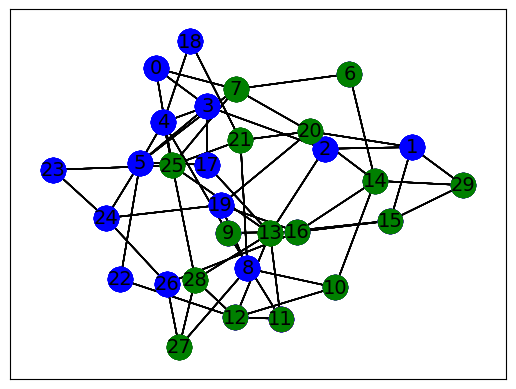

<Figure size 2000x2000 with 0 Axes>

In [85]:
G = nx.watts_strogatz_graph(30, k = 4, p = 0.5)
SIR_model_on_graph(0.45, G, 10)

In [86]:
curr_path = os.getcwd()
direct = 'gif'
path = os.path.join(curr_path, direct)
    
os.chdir(path)
Gif(path, 'WS_task2')
os.chdir('..')

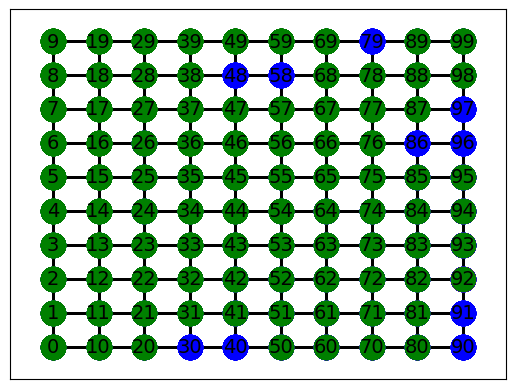

<Figure size 2000x2000 with 0 Axes>

In [87]:
SIR_model_on_graph(0.55, "lattice", 10)

In [88]:
curr_path = os.getcwd()
direct = 'gif'
path = os.path.join(curr_path, direct)
    
os.chdir(path)
Gif(path, 'Lattice_task2')
os.chdir('..')

In [89]:
def SIR_model_on_graph_infected(p, start, G, N=10):
    
    '''Simulation of spreading an infections,
    p-list of probabilities of contagion between the adjacent infected and susceptible node
    G - type of graph
    start - the staring point'''
    
    if G == "lattice":
        G = nx.grid_2d_graph(N,N)
        pos = dict( (n, n) for n in G.nodes() )
        labels = dict( ((i, j), i * 10 + j) for i, j in G.nodes() )
    all_nodes = G.nodes()
    infected_nodes = [start]
    recovered_nodes = []
    susceptible_nodes = list(set(all_nodes) - set(infected_nodes))
    counter = 0
    list_counter = []
    fraction_of_infected_nodes = []
    
    while len(infected_nodes) > 0:
        fraction_of_infected_nodes.append(len(infected_nodes)/len(G.nodes()))
        contaged_at_timestep = []
        recovered_at_timestep = []
        for infected in infected_nodes:
            neighbours = list(G.neighbors(infected))
            susceptible_neighbours=[]
            for neighbour in neighbours:
                if neighbour in susceptible_nodes:
                    susceptible_neighbours.append(neighbour)
            for i in susceptible_neighbours:
                rand = random.random()
                if rand < p:
                    contaged_at_timestep.append(i)
                    susceptible_nodes.remove(i)
            recovered_nodes.append(infected)
            recovered_at_timestep.append(infected)
        for z in contaged_at_timestep:
            infected_nodes.append(z)
        for s in recovered_at_timestep:
            infected_nodes.remove(s)
        counter+=1
        list_counter.append(counter)
    fraction_of_whole_network = round(len(recovered_nodes)/len(all_nodes),3)
    time_to_clear_infection = counter+1
    time_to_largest_infected_nodes = fraction_of_infected_nodes.index(max(fraction_of_infected_nodes))+1
    return list_counter, fraction_of_infected_nodes, fraction_of_whole_network, time_to_clear_infection, time_to_largest_infected_nodes

In [90]:
def SIR_model_analysis(list_p,G,start = 1, N=10):
    '''Function use the monte Carlo Method to simulate multiple times the spreding 
    of the infection on the gifen graph 
    p-list of probabilities of contagion between the adjacent infected and susceptible node
    G - type of graph
    start - the staring node
    '''
    fractions = []
    timestep = []
    fractions_of_network_infected = []
    time_to_clear_infection = []
    time_to_largest_infected_nodes = []
    for p in list_p:
        avr_SIR_dict = {}
        for i in range(200):
            avr_SIR_dict[i] = 0
        lengths=[]
        frac_whole_network = []
        time_end_infection = []
        time_to_larges_number_of_infected_nodes = []
        for k in range(100):
            if G == "lattice":
                SIR = SIR_model_on_graph_infected(p, start, "lattice", N)
            else:
                SIR = SIR_model_on_graph_infected(p, start, G)
            SIR_dict = dict(zip(SIR[0],SIR[1]))
            lengths.append(len(SIR_dict))
            avr_SIR_dict = dict(Counter(avr_SIR_dict) + Counter(SIR_dict))
            frac_whole_network.append(SIR[2])
            time_end_infection.append(SIR[3])
            time_to_larges_number_of_infected_nodes.append(SIR[4])
        average_values = list(avr_SIR_dict.values())
        lista1 = []
        for i in range(1,max(lengths)+1):
            counter = 0
            for j in lengths:
                if i <=j:
                    counter = counter + 1
                lista1.append(counter)
        averages = []
        time = []
        for i in range(0,len(average_values)):
            averages.append(round(average_values[i]/lista1[i],3))
            time.append(i)
        fractions.append(averages)
        timestep.append(time)
        fractions_of_network_infected.append(round(np.mean(frac_whole_network),3))
        time_to_clear_infection.append(np.mean(time_end_infection))
        time_to_largest_infected_nodes.append(np.mean(time_to_larges_number_of_infected_nodes))
    return fractions, timestep, fractions_of_network_infected, time_to_clear_infection, time_to_largest_infected_nodes     

In [91]:
G = nx.fast_gnp_random_graph(100, 0.07)
solution = SIR_model_analysis([0.25, 0.5, 0.95], G, start = 1)

In [92]:
fractions_p1 = solution[0][0]
fractions_p2 = solution[0][1]
fractions_p3 = solution[0][2]

timestep_p1 = solution[1][0]
timestep_p2 = solution[1][1]
timestep_p3 = solution[1][2]

fractions_of_network_infected_p1 = solution[2][0]
fractions_of_network_infected_p2 = solution[2][1]
fractions_of_network_infected_p3 = solution[2][2]

time_to_clear_infection_p1 = solution[3][0]
time_to_clear_infection_p2 = solution[3][1]
time_to_clear_infection_p3 = solution[3][2]

time_to_largest_infected_nodes_p1 = solution[4][0]
time_to_largest_infected_nodes_p2 = solution[4][1]
time_to_largest_infected_nodes_p3 = solution[4][2]

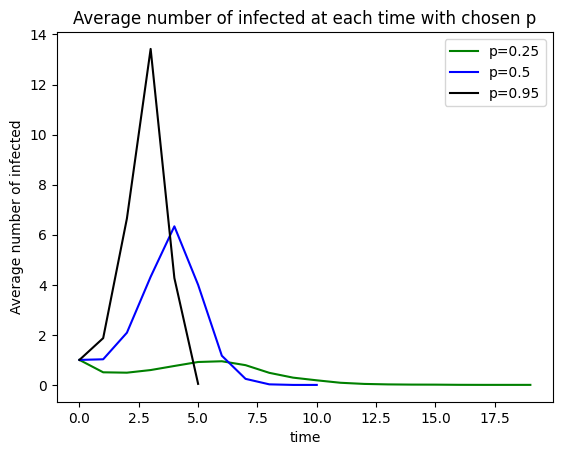

In [93]:
plt.plot(timestep_p1, fractions_p1, 'g-',label = 'p=0.25')
plt.plot(timestep_p2, fractions_p2, 'b-',label = 'p=0.5')
plt.plot(timestep_p3, fractions_p3, 'k-',label = 'p=0.95')
plt.xlabel('time')
plt.ylabel('Average number of infected')
plt.title('Average number of infected at each time with chosen p')
plt.legend(loc='best')
plt.show()

Text(0.5, 1.0, 'Average time to the largest  number of infected nodes')

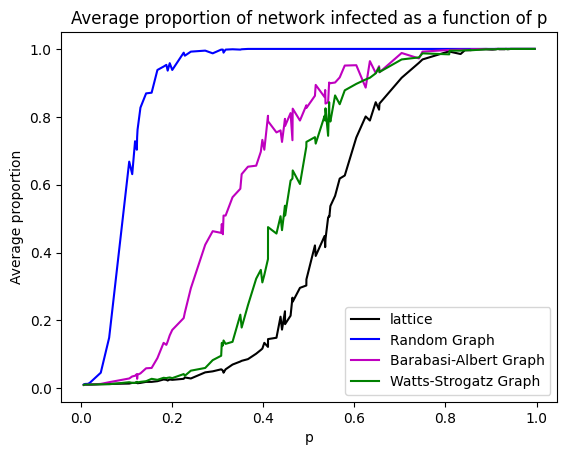

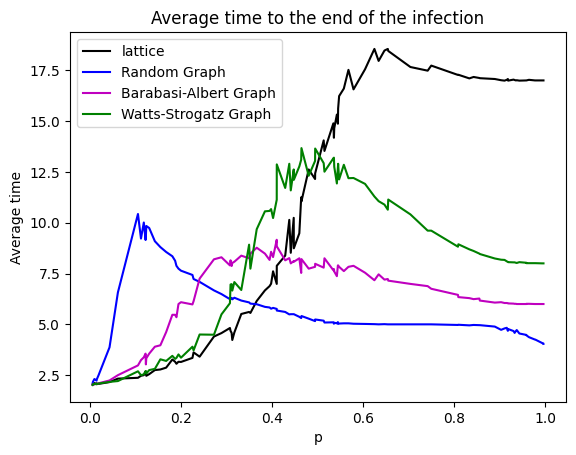

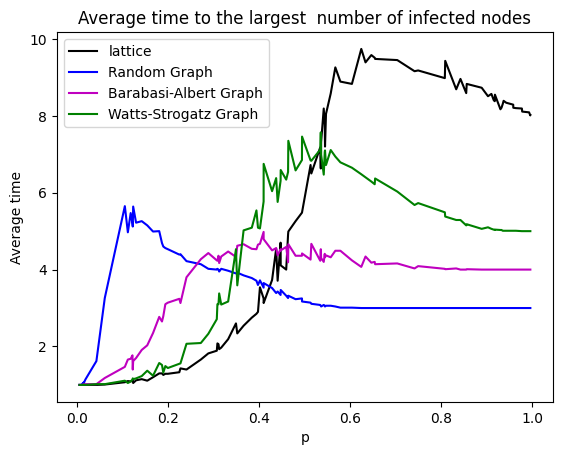

In [94]:
N = 100
G_random = nx.fast_gnp_random_graph(N, 0.2)
G_BA = nx.barabasi_albert_graph(N, 3)
G_WS = nx.watts_strogatz_graph(N, k = 4, p = 0.5)
list_p = sorted(list(random.random() for i in range(100)))
sol_lattice = SIR_model_analysis(list_p,"lattice",(random.randint(1, int(np.sqrt(N))-1), random.randint(1, int(np.sqrt(N))-1)), int(np.sqrt(N)))
sol_random = SIR_model_analysis(list_p,G_random,start = random.randint(1,N), N=100)
sol_BA = SIR_model_analysis(list_p,G_BA,start = random.randint(1,N), N=100)
sol_WS = SIR_model_analysis(list_p,G_WS,start = random.randint(1,N), N=100)

plt.figure()
plt.plot(list_p, sol_lattice[2], 'k-', label = 'lattice')
plt.plot(list_p, sol_random[2], 'b-', label = "Random Graph")
plt.plot(list_p,sol_BA[2], 'm-', label = "Barabasi-Albert Graph")
plt.plot(list_p, sol_WS[2], 'g-', label = "Watts-Strogatz Graph")
plt.xlabel("p")
plt.ylabel("Average proportion")
plt.legend(loc='best')
plt.title("Average proportion of network infected as a function of p")

plt.figure()
plt.plot(list_p, sol_lattice[3], 'k-', label = 'lattice')
plt.plot(list_p, sol_random[3], 'b-', label = "Random Graph")
plt.plot(list_p,sol_BA[3], 'm-', label = "Barabasi-Albert Graph")
plt.plot(list_p, sol_WS[3], 'g-', label = "Watts-Strogatz Graph")
plt.xlabel("p")
plt.ylabel("Average time")
plt.legend(loc='best')
plt.title("Average time to the end of the infection")

plt.figure()
plt.plot(list_p, sol_lattice[4], 'k-', label = 'lattice')
plt.plot(list_p, sol_random[4], 'b-', label = "Random Graph")
plt.plot(list_p,sol_BA[4], 'm-', label = "Barabasi-Albert Graph")
plt.plot(list_p, sol_WS[4], 'g-', label = "Watts-Strogatz Graph")
plt.xlabel("p")
plt.ylabel("Average time")
plt.legend(loc='best')
plt.title("Average time to the largest  number of infected nodes")

## Task 3


In [95]:
def Asyn_SIR_on_graph(p, G, T = 20, N = 10):
   
    '''Function visualize the spreding of the infection on a given network, the 
    outcomes will be use to create gif
    
    p - probability of contagion between node. One of them is infected and the other is susceptible, type: int
    G - graph object, type: nx object
    N - size of the latice, by default 10x10'''
    
    # Case for grid graph
    
    t = np.arange(T+1)
    S = []
    I = []
    R = []
    if G == "lattice":
        G = nx.grid_2d_graph(N,N)
        pos = dict( (n, n) for n in G.nodes() )
        labels = dict( ((i, j), i * N + j) for i, j in G.nodes() )
        start = (random.randint(0, N-1),random.randint(0, N-1))
    else:
        start = random.randint(0,len(G.nodes()) - 1)
        pos = nx.spring_layout(G)
        labels = {i: i for i in range(0,len(G.nodes()))}
    
    # set all nodes as health
    for nd in G.nodes:
        G.nodes[nd]['state'] = 'S'
    G.nodes[start]['state'] = 'I' # choose 1 node as infected
    
    all_nodes = list(G.nodes)
    sl = []
    il = []
    rl = []
    for node, data in G.nodes(data=True):
            if data['state'] == 'S':
                sl.append(node)
            elif data['state'] == 'I':
                il.append(node)
            else:
                rl.append(node)
    
    S.append(len(sl))
    I.append(len(il))
    R.append(len(rl))
    
    curr_path = os.getcwd()
    direct = 'gif'
    path = os.path.join(curr_path, direct)
    
    if os.path.exists(path):
        shutil.rmtree(path)
        
    os.mkdir(path)
    os.chdir(path)
    
    nx.draw_networkx_edges(G, pos)       
    nx.draw_networkx_nodes(G, pos, nodelist = sl, node_color = 'b')
    nx.draw_networkx_nodes(G, pos, nodelist = il, node_color = 'r')
    nx.draw_networkx_nodes(G, pos, nodelist = rl, node_color = 'g')
    nx.draw_networkx_labels(G, pos, labels, font_size = 14)
    plt.title('step 0')
    plt.axis("off")
    plt.savefig("Graph" + str(0) + ".png", dpi = 300)
    plt.close()
    
    for mc in range(T):
        counter = 0
        contaged = []
        infected_at_timestep = []
        
       # for node, data in G.nodes(data=True):
       #     if data['state'] == 'I':
       #         infected_at_timestep.append(node)
        
        while counter < len(G):
            counter += 1
            i = random.randint(0,len(all_nodes)-1)
            nd = all_nodes[i]
            if G.nodes[nd]['state'] == 'I':
                contaged = contaged + list(G.neighbors(nd))
                infected_at_timestep.append(nd)
        
        for nd in contaged:
            r = random.random()
            if G.nodes[nd]['state'] == 'S' and r < p:
                G.nodes[nd]['state'] = 'I'
        
        for nd in infected_at_timestep:
            G.nodes[nd]['state'] = 'R'
            
        sl = []
        il = []
        rl = []
        for node, data in G.nodes(data=True):
            if data['state'] == 'S':
                sl.append(node)
            elif data['state'] == 'I':
                il.append(node)
            else:
                rl.append(node)
        
        S.append(len(sl))
        I.append(len(il))
        R.append(len(rl))
        nx.draw_networkx_edges(G, pos)        
        nx.draw_networkx_nodes(G, pos, nodelist = sl, node_color='b')
        nx.draw_networkx_nodes(G, pos, nodelist = il, node_color='r') 
        nx.draw_networkx_nodes(G, pos, nodelist = rl, node_color='g')
        plt.title('step {}'.format(mc+1))
        plt.axis("off")
        nx.draw_networkx_labels(G, pos, labels, font_size = 14)
        plt.savefig("Graph" + str(mc + 1) + ".png", dpi = 300)
        plt.close()
        
    os.chdir('..')
    
    fig, ax = plt.subplots(figsize = (12, 8))
    ax.plot(t, S, 'bo-', label = 'S')
    ax.plot(t, I, 'ro-', label = 'I')
    ax.plot(t, R, 'go-', label = 'R')
    ax.legend()
    plt.title('SIR model for p={}'.format(p))
    plt.show()

## for gif

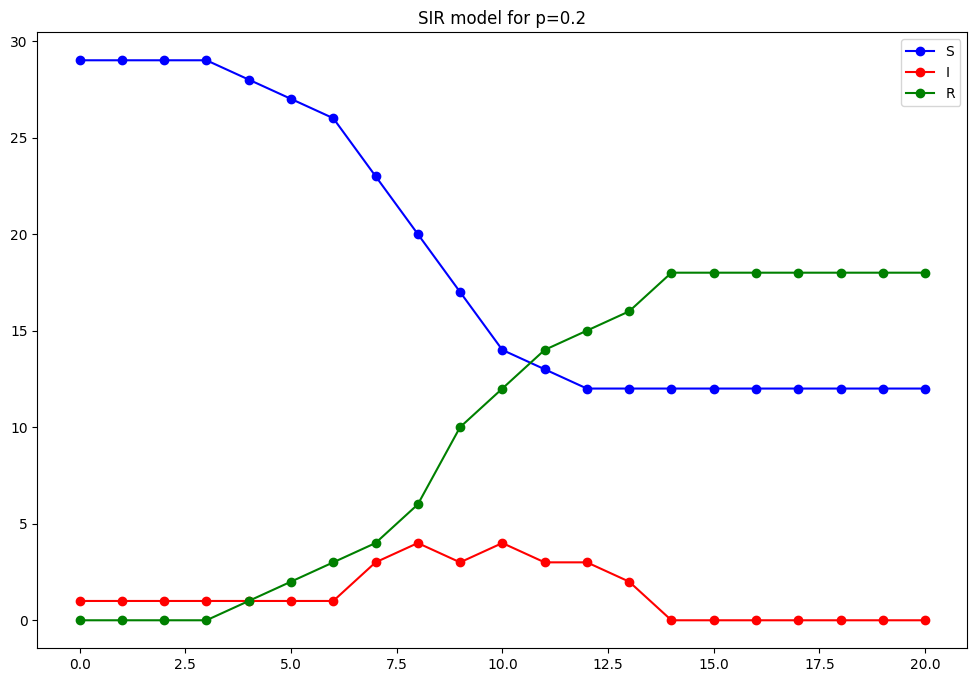

In [96]:
G = nx.fast_gnp_random_graph(30, 0.2)
Asyn_SIR_on_graph(0.2, G)

In [97]:
curr_path = os.getcwd()
direct = 'gif'
path = os.path.join(curr_path, direct)
    
os.chdir(path)
Gif(path, 'Random')
os.chdir('..')


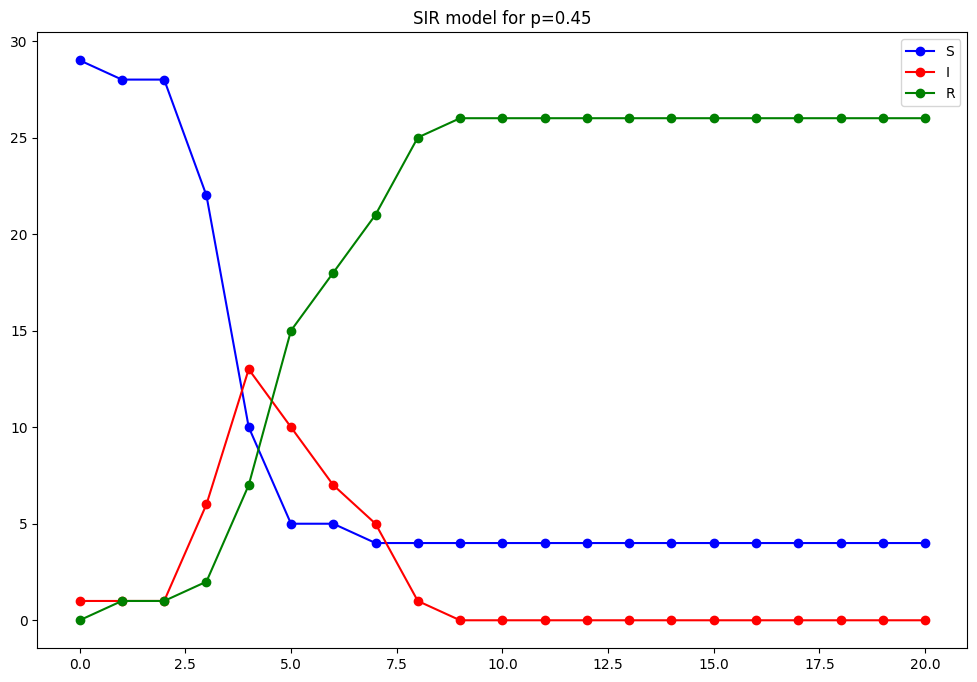

In [98]:
G = nx.barabasi_albert_graph(30, 3)
Asyn_SIR_on_graph(0.45, G)

In [99]:
curr_path = os.getcwd()
direct = 'gif'
path = os.path.join(curr_path, direct)
    
os.chdir(path)
Gif(path, 'BA')
os.chdir('..')

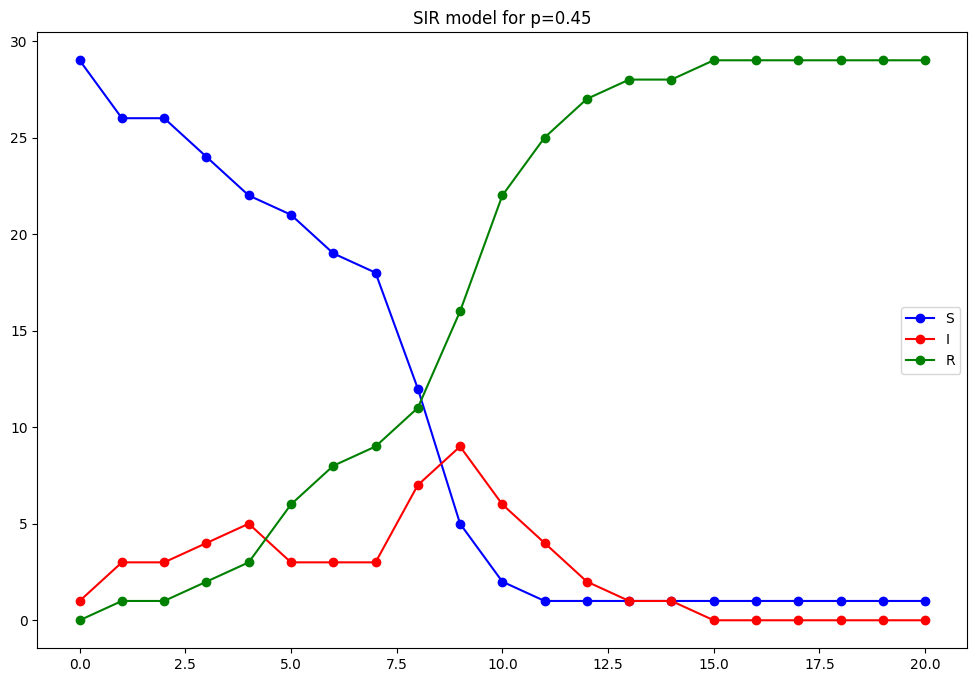

In [100]:
G = nx.watts_strogatz_graph(30, k = 4, p = 0.5)
Asyn_SIR_on_graph(0.45, G)

In [101]:
curr_path = os.getcwd()
direct = 'gif'
path = os.path.join(curr_path, direct)
    
os.chdir(path)
Gif(path, 'WS')
os.chdir('..')

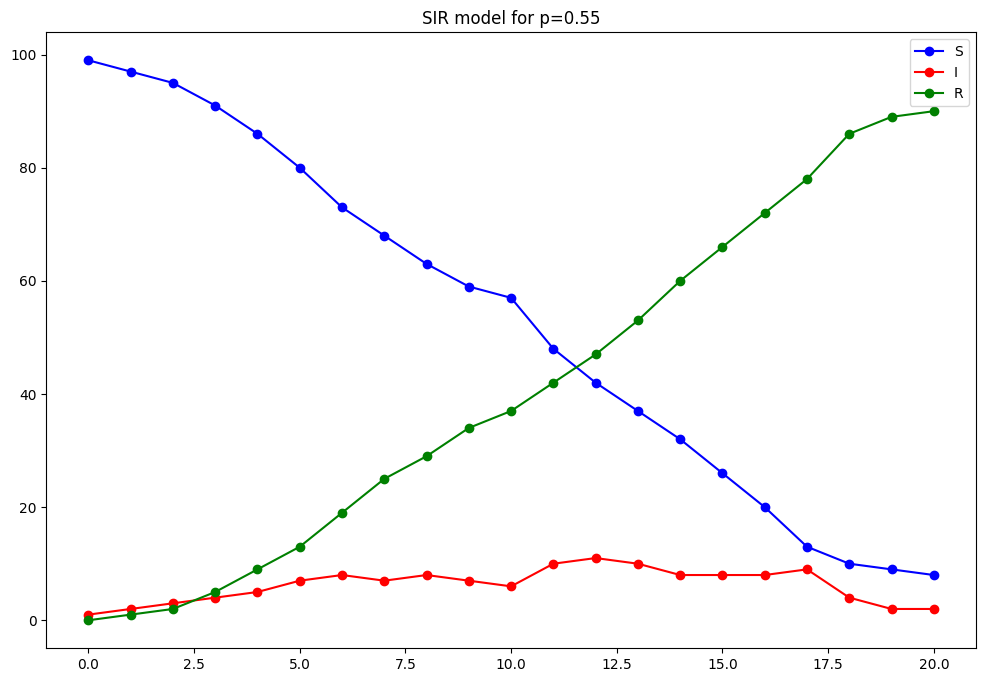

In [102]:
Asyn_SIR_on_graph(0.55, 'lattice')

In [103]:
curr_path = os.getcwd()
direct = 'gif'
path = os.path.join(curr_path, direct)
    
os.chdir(path)
Gif(path, 'Lattice')
os.chdir('..')

In [104]:
def Asyn_SIR_on_graph_infected(p, G, start, T = 20, N = 10):
   
    '''Simulation of spreading an infections,
    
    p - probability of contagion between node. One of them is infected and the other is susceptible, type: int
    G - graph object, type: nx object
    start - starting node,
    T - time steps,
    N - size of the latice, by default 10x10'''
    
    # Case for grid graph
    
    t = np.arange(T+1)
    S = np.zeros(T+1)
    I = np.zeros(T+1)
    R = np.zeros(T+1)
    if G == "lattice":
        G = nx.grid_2d_graph(N,N)
        pos = dict( (n, n) for n in G.nodes() )
        labels = dict( ((i, j), i * N + j) for i, j in G.nodes() )
        start = (random.randint(0, N-1),random.randint(0, N-1))
    else:
        start = random.randint(0,len(G.nodes()) - 1)
        pos = nx.spring_layout(G)
        labels = {i: i for i in range(0,len(G.nodes()))}
    
    # set all nodes as health
    for nd in G.nodes:
        G.nodes[nd]['state'] = 'S'
    G.nodes[start]['state'] = 'I' # choose 1 node as infected
    
    all_nodes = list(G.nodes)
    sl = []
    il = []
    rl = []
    for node, data in G.nodes(data=True):
            if data['state'] == 'S':
                sl.append(node)
            elif data['state'] == 'I':
                il.append(node)
            else:
                rl.append(node)
    
    S[0] = len(sl)
    I[0] = len(il)
    R[0] = len(rl)
       
    for mc in range(T):
        counter = 0
        contaged = []
        infected_at_timestep = []
        
       # for node, data in G.nodes(data=True):
       #     if data['state'] == 'I':
       #         infected_at_timestep.append(node)
        
        while counter < len(G):
            counter += 1
            i = random.randint(0,len(all_nodes)-1)
            nd = all_nodes[i]
            if G.nodes[nd]['state'] == 'I':
                contaged = contaged + list(G.neighbors(nd))
                infected_at_timestep.append(nd)
        
        for nd in contaged:
            r = random.random()
            if G.nodes[nd]['state'] == 'S' and r < p:
                G.nodes[nd]['state'] = 'I'
        
        for nd in infected_at_timestep:
            G.nodes[nd]['state'] = 'R'
            
        sl = []
        il = []
        rl = []
        for node, data in G.nodes(data=True):
            if data['state'] == 'S':
                sl.append(node)
            elif data['state'] == 'I':
                il.append(node)
            else:
                rl.append(node)
        
        S[mc+1] = len(sl)
        I[mc+1] = len(il)
        R[mc+1] = len(rl)
    
    fraction_of_whole_network = round(R[-1]/len(all_nodes),3)
    time_to_clear_infection = t[np.min(I) == I][0]
    time_to_largest_infected_nodes = t[np.max(I) == I][0]
    
    return I, t, fraction_of_whole_network, time_to_clear_infection, time_to_largest_infected_nodes

In [105]:
def MC_analyst(MC, G, list_p, start = 1, T = 25, N = 10):
    '''Function use the monte Carlo Method to simulate multiple times the spreding 
    of the infection on the gifen graph 
    p-list of probabilities of contagion between the adjacent infected and susceptible node
    G - type of graph
    start - the starting node
    T - time steps
    N - size of the latice, by default 10x10 '''
    
    avg_infected = []
    proportion = []
    avg_time_end_inf = []
    avg_time_largest_inf = []
    time = np.arange(T+1)
    
    for p in list_p:
        infected = np.zeros(T+1)
        frac_of_whole_network = np.zeros(MC)
        time_to_clear_inf = np.zeros(MC)
        time_to_large_inf = np.zeros(MC)
        
        for mc in range(MC):
            I, t, fraction_of_whole_network, time_to_clear_infection, time_to_largest_infected_nodes = Asyn_SIR_on_graph_infected(p, G, start, T = T, N = N)
            infected += I
            frac_of_whole_network[mc] = fraction_of_whole_network
            time_to_clear_inf[mc] = time_to_clear_infection
            time_to_large_inf[mc] = time_to_largest_infected_nodes
            
        avg_infected.append(infected/MC)
        proportion.append(np.mean(frac_of_whole_network))
        avg_time_end_inf.append(np.mean(time_to_clear_inf))
        avg_time_largest_inf.append(np.mean(time_to_large_inf))
        
    return avg_infected, time, proportion, avg_time_end_inf, avg_time_largest_inf 

In [106]:
N = 100
G_random = nx.fast_gnp_random_graph(N, 0.2)
list_p = [0.25, 0.5, 0.95]
solution = MC_analyst(200, G_random, list_p)

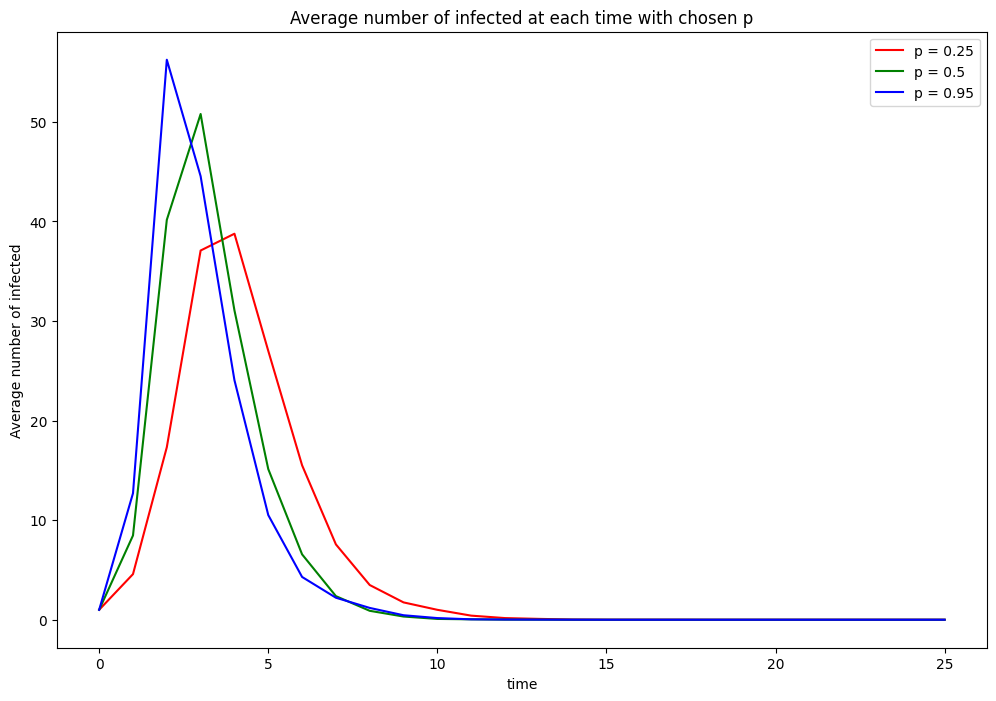

In [107]:
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(solution[1], solution[0][0], 'r', label = 'p = 0.25')
ax.plot(solution[1], solution[0][1], 'g', label = 'p = 0.5')
ax.plot(solution[1], solution[0][2], 'b', label = 'p = 0.95')
ax.set_xlabel('time')
ax.set_ylabel('Average number of infected')
plt.title('Average number of infected at each time with chosen p')
ax.legend()
plt.show()

## for analysis

In [108]:
N = 100
G_random = nx.fast_gnp_random_graph(N, 0.2)
G_BA = nx.barabasi_albert_graph(N, 3)
G_WS = nx.watts_strogatz_graph(N, k = 4, p = 0.5)
list_p = np.linspace(0, 1, 11)
#sol_lattice = MC_analyst(200, 'lattice', list_p, start = (2,2))
sol_random = MC_analyst(200, G_random, list_p)
sol_BA = MC_analyst(200, G_BA, list_p)
sol_WS = MC_analyst(200, G_WS, list_p)

## for plots

Text(0.5, 1.0, 'Average time to the largest  number of infected nodes')

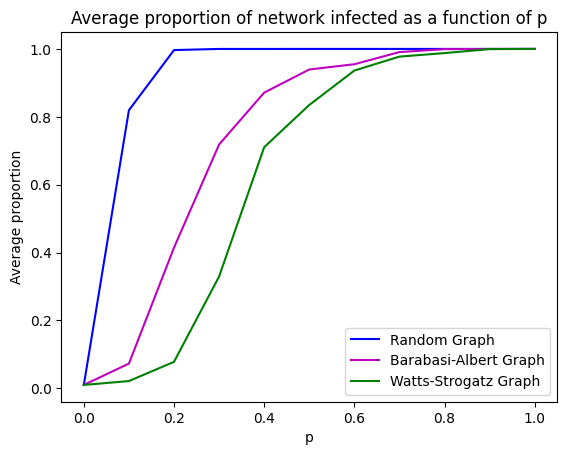

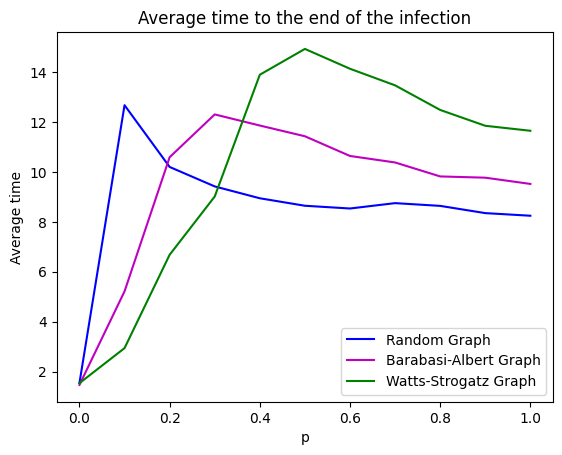

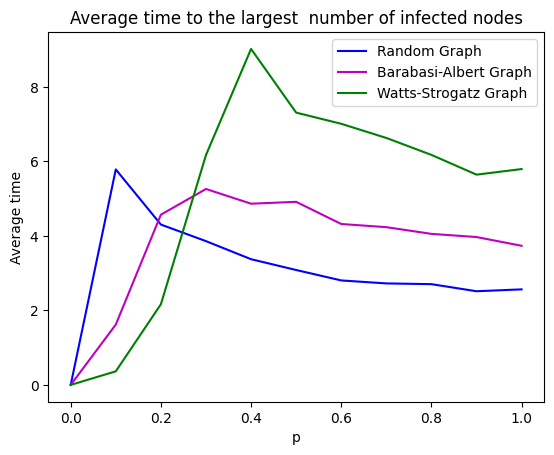

In [109]:
plt.figure()
#plt.plot(list_p, sol_lattice[2], 'k-', label = 'lattice')
plt.plot(list_p, sol_random[2], 'b-', label = "Random Graph")
plt.plot(list_p, sol_BA[2], 'm-', label = "Barabasi-Albert Graph")
plt.plot(list_p, sol_WS[2], 'g-', label = "Watts-Strogatz Graph")
plt.xlabel("p")
plt.ylabel("Average proportion")
plt.legend(loc='best')
plt.title("Average proportion of network infected as a function of p")

plt.figure()
#plt.plot(list_p, sol_lattice[3], 'k-', label = 'lattice')
plt.plot(list_p, sol_random[3], 'b-', label = "Random Graph")
plt.plot(list_p,sol_BA[3], 'm-', label = "Barabasi-Albert Graph")
plt.plot(list_p, sol_WS[3], 'g-', label = "Watts-Strogatz Graph")
plt.xlabel("p")
plt.ylabel("Average time")
plt.legend(loc='best')
plt.title("Average time to the end of the infection")

plt.figure()
#plt.plot(list_p, sol_lattice[4], 'k-', label = 'lattice')
plt.plot(list_p, sol_random[4], 'b-', label = "Random Graph")
plt.plot(list_p,sol_BA[4], 'm-', label = "Barabasi-Albert Graph")
plt.plot(list_p, sol_WS[4], 'g-', label = "Watts-Strogatz Graph")
plt.xlabel("p")
plt.ylabel("Average time")
plt.legend(loc='best')
plt.title("Average time to the largest  number of infected nodes")